### Importing Libraries

In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import sqlite3

In [364]:
df = pd.read_csv(r"C:\Users\fa24-bbd-106\Desktop/hr_dataset_original.csv")
df.head(60)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [366]:
conn = sqlite3.connect(r"C:\Users\fa24-bbd-106\Desktop/chinook.db")

In [368]:
df2 = pd.read_sql_query("SELECT  name FROM sqlite_master WHERE type = 'table';", conn)

In [370]:
df2

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


### Part 1 Data Exploration and visualiziation

In [373]:
#Load the Hr_dataset_orginal.csv and assign appropriate name to the Data Frame. Display the firts Few Rows of the Data set
hrdf = pd.read_csv(r"C:\Users\fa24-bbd-106\Desktop/hr_dataset_original.csv")
hrdf.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [376]:
#2 Perform Initial EDA. Including Info and describe ITerpret the descriptives with atleast three insights
hrdf.info()
hrdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [378]:
#Insight 1: Satisfaction is Low for Many Employees
#The average satisfaction level is 0.61, but the minimum is 0.09, which shows some employees were really unhappy.

#Insight 2: Some People Work Too Much
#The average monthly working hours is about 201, but some people worked up to 310 hours, which is very high and may lead to burnout.

#Insight 3: Very Few Promotions
#Only about 2.1 (mean = 0.021) of employees got promoted in the last 5 years. This might affect motivation and satisfaction.


In [380]:
#Part3 Display all column names check for missing values and duplicates if any. Drop Duplicates if found
hrdf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [382]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [384]:
#there are none but still for satisfaction
hrdf.drop_duplicates(inplace = True)
df.shape

(14999, 10)

Counts:
 left
0    10000
1     1991
Name: count, dtype: int64

Percentage:
 left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


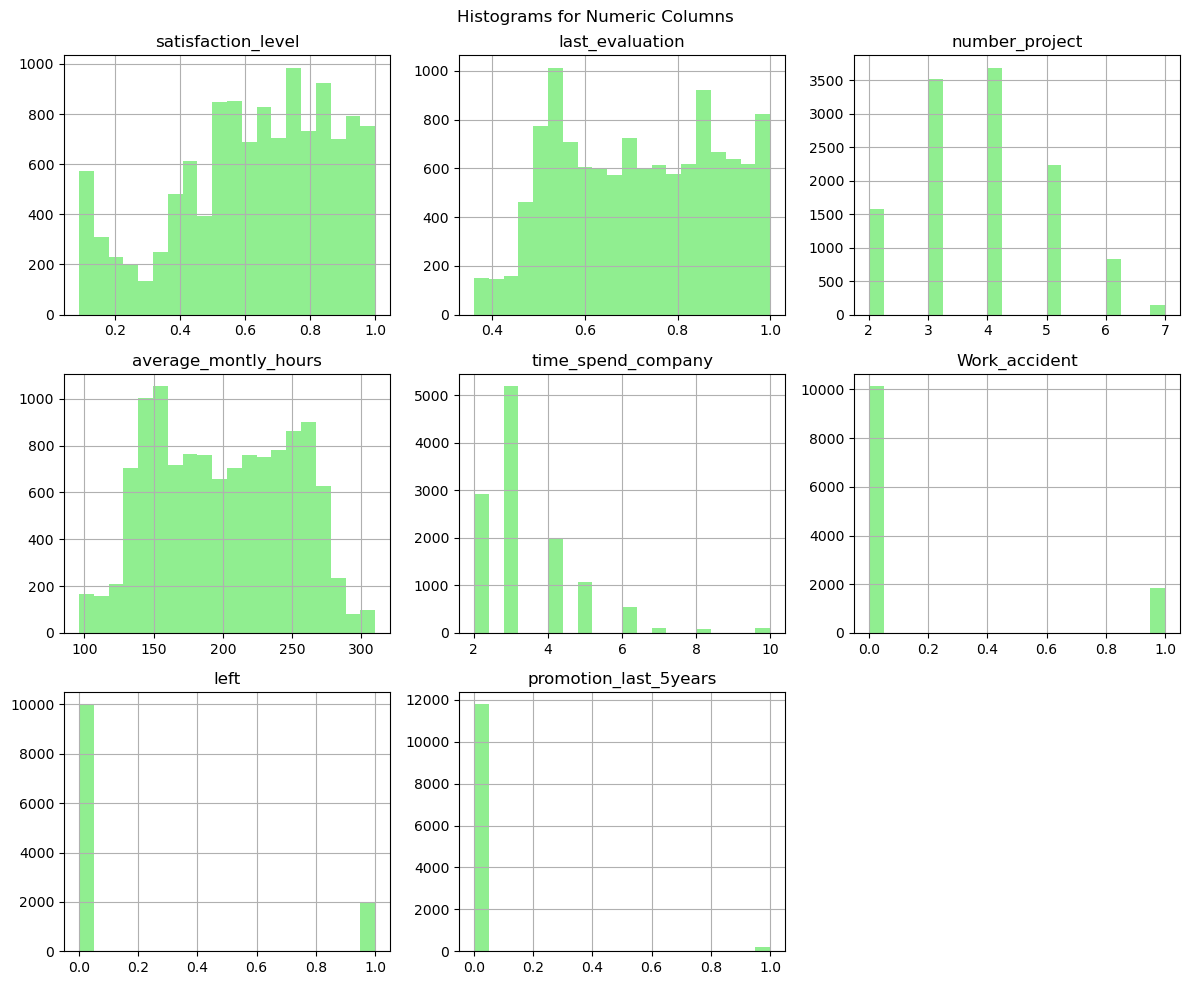

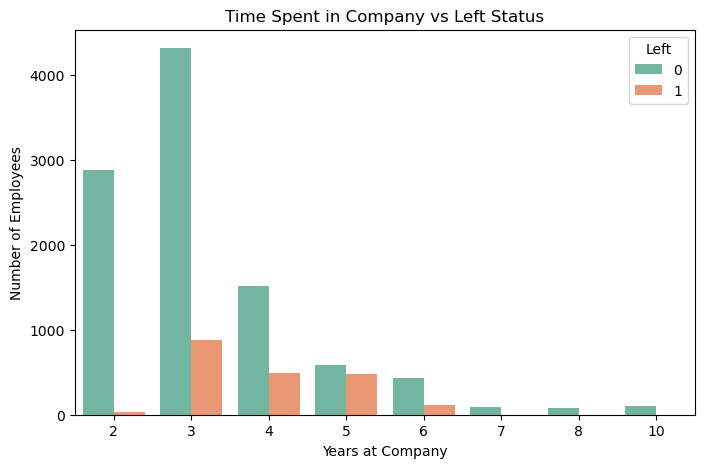

C:\Users\fa24-bbd-106\AppData\Local\Temp\ipykernel_11308\140906964.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='left', y='last_evaluation', data=hrdf, palette='Pastel1')


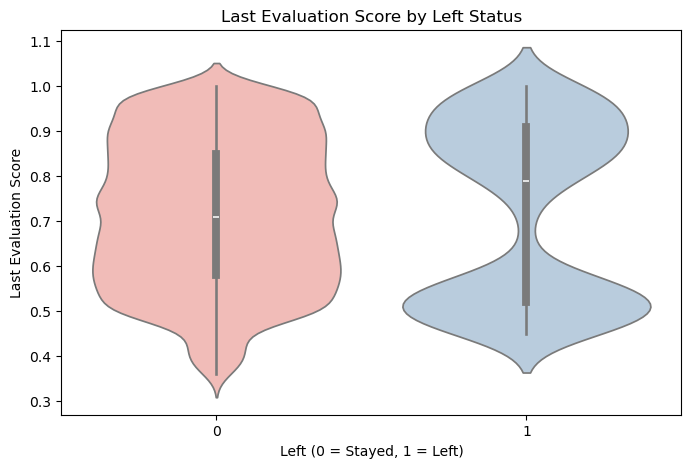

In [386]:
#question No 5
#display counts and percentage of employees who left vs stayed
# Count
left_counts = hrdf['left'].value_counts()
print("Counts:\n", left_counts)

# Percentage
left_percent = hrdf['left'].value_counts(normalize=True) * 100
print("\nPercentage:\n", left_percent)

#Plot Histogram for all numeric variables
hrdf.hist(figsize=(12, 10), bins=20, color='lightgreen')
plt.suptitle("Histograms for Numeric Columns")
plt.tight_layout()
plt.show()

#create a bar plot showing the relationship between time spent in the company and left status
plt.figure(figsize=(8, 5))
sns.countplot(x='time_spend_company', hue='left', data=hrdf, palette='Set2')
plt.title("Time Spent in Company vs Left Status")
plt.xlabel("Years at Company")
plt.ylabel("Number of Employees")
plt.legend(title='Left')
plt.show()

#Create a violin plot to visualize the distribution of last evaluation scores by left status
plt.figure(figsize=(8, 5))
sns.violinplot(x='left', y='last_evaluation', data=hrdf, palette='Pastel1')
plt.title("Last Evaluation Score by Left Status")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.ylabel("Last Evaluation Score")
plt.show()


### Part 2 Logistic Regression

In [389]:
#question NO 6
#Convert Categorical text data into numeric labels

le = LabelEncoder()

# Convert 'Department'
hrdf['Department'] = le.fit_transform(hrdf['Department'])

# Convert 'salary'
hrdf['salary'] = le.fit_transform(hrdf['salary'])


In [391]:
#q7 Define features and target. Split data into train and test. Initialize and tran a logistic Regression model
# All columns except 'left' are features
X = hrdf.drop('left', axis=1)
# Target variable
y = hrdf['left']

In [393]:
# Split into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [395]:
#Make prediction. Evaluate using Confusion matrix, accuracy score, and classification report. Visualtize the confusion matrix
y_pred = model.predict(X_test)


In [397]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", acc)
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[2873  122]
 [ 482  121]]

Accuracy Score: 0.8321289605336298

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90      2995
           1       0.50      0.20      0.29       603

    accuracy                           0.83      3598
   macro avg       0.68      0.58      0.60      3598
weighted avg       0.80      0.83      0.80      3598



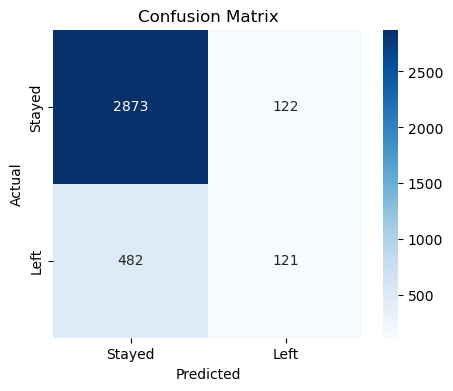

In [399]:
#Ploting now
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Question No:9, Interpret the results of ur model and translate them into Business implication

Solution
We explored the HR dataset and found key patterns like low satisfaction and high work hours.
Through confusion Matrix we were able to see that the confusion Matrix the True possitve customers have stayed and good 
and are more then true negative componetnts and also our model was accured it predicted better and good over all
but the amount of the customers who have left are also more and we have to do something to that since our work hours are more we should decrease 'em

In [403]:
#Using the following Transaction Data set:
dataset_basket_1 = [
    ['Milk','Bread','Butter','Cheese','Apple','Orange'],
    ['Bread','Diapers','Eggs','Banana','Cheese'],
    ['Milk','Diapers','Cola','Banana','Apple'],
    ['Bread','Butter','Diapers','Apple','Orange'],
    ['Milk','Bread','Butter','Cheese','Orange'],
    ['Eggs','Banana','Cheese','Cola','Apple'],
    ['Milk','Orange','Butter','Banana','Cheese'],
    ['Cola','Diapers','Eggs','Orange','Bread']
]
#Perform the following One-Hot Encode the Dataset
#Genrate frequent items with minimum support of 0.6
#Genrate association rules with minimum of confidence of 0.7
#Display itemsets and rules
#write ateleast two business insights for the rules

In [405]:
te = TransactionEncoder()
te_data = te.fit(dataset_basket_1).transform(dataset_basket_1)
df = pd.DataFrame(te_data, columns=te.columns_)

In [407]:
frequent_items = apriori(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:\n", frequent_items)


Frequent Itemsets:
    support  itemsets
0    0.625   (Bread)
1    0.625  (Cheese)
2    0.625  (Orange)


In [409]:
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.7)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Association Rules:
 Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


### Question No.4 SQL Queries with Chinook DB

In [412]:
cursor = conn.cursor()
try:
    # A. Display all table names
    cursor = conn.cursor()
    tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
    print("Tables:", tables)

    # B. Select FirstName and LastName of all customers
    df_customers = pd.read_sql_query("SELECT FirstName, LastName FROM customers;", conn)
    print("\nCustomer Names:\n", df_customers)

    # C. Count the number of invoices from each country
    df_invoices = pd.read_sql_query("""
        SELECT BillingCountry, COUNT(*) AS InvoiceCount
        FROM invoices
        GROUP BY BillingCountry;
    """, conn)
    print("\nInvoice Count by Country:\n", df_invoices)

    # D. INNER JOIN tracks and albums, show TrackId, Name, AlbumId
    df_tracks = pd.read_sql_query("""
        SELECT tracks.TrackId, tracks.Name, tracks.AlbumId
        FROM tracks
        INNER JOIN albums ON tracks.AlbumId = albums.AlbumId;
    """, conn)
    print("\nTrack Information:\n", df_tracks)

finally:
    # Safely close the database connection
    conn.close()
    print("\nDatabase connection closed securely.")


Tables: [('albums',), ('sqlite_sequence',), ('artists',), ('customers',), ('employees',), ('genres',), ('invoices',), ('invoice_items',), ('media_types',), ('playlists',), ('playlist_track',), ('tracks',), ('sqlite_stat1',)]

Customer Names:
     FirstName      LastName
0        Luís     Gonçalves
1      Leonie        Köhler
2    François      Tremblay
3       Bjørn        Hansen
4   František   Wichterlová
5      Helena          Holý
6      Astrid        Gruber
7        Daan       Peeters
8        Kara       Nielsen
9     Eduardo       Martins
10  Alexandre         Rocha
11    Roberto       Almeida
12   Fernanda         Ramos
13       Mark       Philips
14   Jennifer      Peterson
15      Frank        Harris
16       Jack         Smith
17   Michelle        Brooks
18        Tim         Goyer
19        Dan        Miller
20      Kathy         Chase
21    Heather       Leacock
22       John        Gordon
23      Frank       Ralston
24     Victor       Stevens
25    Richard    Cunningham
2